In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os



In [15]:
movies_df = pd.read_csv('../data/movies.csv')
ratings_df = pd.read_csv('../data/ratings.csv')

# merge 2 bảng
df = pd.merge(movies_df, ratings_df, on='movieId', how='inner')

display(df.head())

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,10,2.5,1169265231
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,3.0,850085076
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.0,1027305751
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,3.0,974704488
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,20,5.0,1553184230


## EDA (phân tích dữ liệu)

/tmp/ipykernel_27241/3096758087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


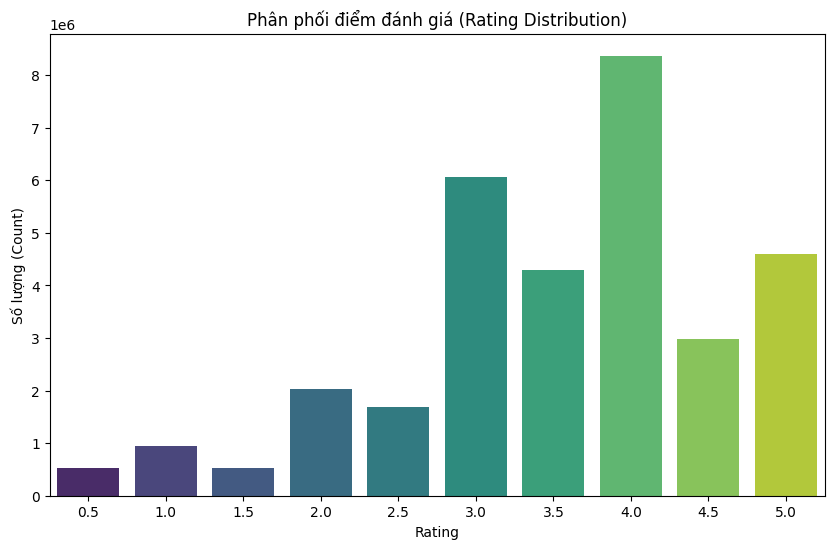

In [4]:
# Cell 4: Phân phối Rating
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Phân phối điểm đánh giá (Rating Distribution)')
plt.xlabel('Rating')
plt.ylabel('Số lượng (Count)')
plt.show()


In [16]:
# Thống kê số lượng rating cho mỗi phim
movie_stats = df.groupby('title').agg({'rating': ['count', 'mean']})
movie_stats.columns = ['rating_count', 'rating_mean']

# Sắp xếp các phim được đánh giá nhiều nhất
top_viewed = movie_stats.sort_values(by='rating_count', ascending=False).head(10)

print("Top 10 phim có nhiều lượt đánh giá nhất:")
display(top_viewed)




Top 10 phim có nhiều lượt đánh giá nhất:


,rating_count,rating_mean
title,,
"Shawshank Redemption, The (1994)",102929,4.404614
Forrest Gump (1994),100296,4.052744
Pulp Fiction (1994),98409,4.196969
"Matrix, The (1999)",93808,4.156437
"Silence of the Lambs, The (1991)",90330,4.148367
Star Wars: Episode IV - A New Hope (1977),85010,4.099824
Fight Club (1999),77332,4.228780
Jurassic Park (1993),75233,3.698623
Schindler's List (1993),73849,4.236990


Số lượng phim ban đầu: 84239
Số lượng phim sau khi lọc (trên 50 ratings): 16034
Dữ liệu còn lại: 31499692 dòng
Số lượng phim sau khi lọc (trên 50 ratings): 16034
Dữ liệu còn lại: 31499692 dòng


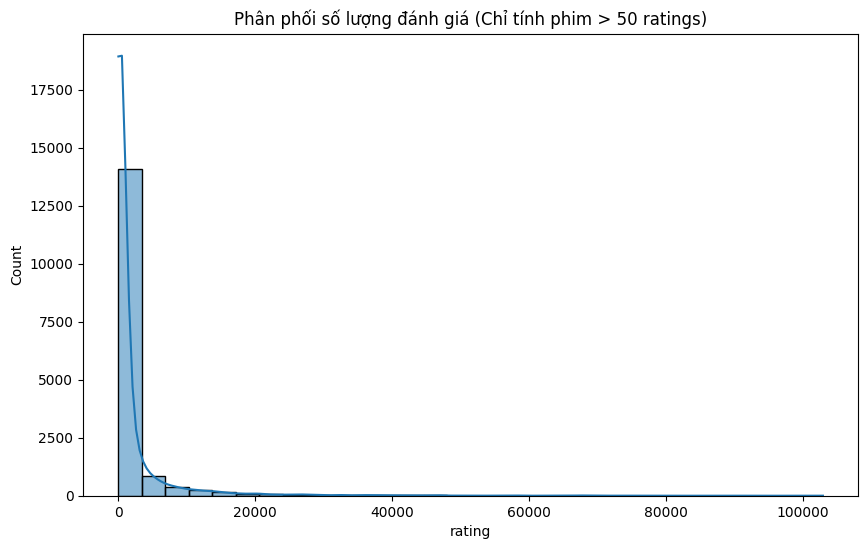

In [17]:

# Đặt ngưỡng: Chỉ giữ lại phim có ít nhất 50 đánh giá (bạn có thể thay đổi số này)
threshold = 50
popular_movies = movie_stats[movie_stats['rating_count'] >= threshold].index

# Lọc dataframe gốc, chỉ giữ lại phim phổ biến
df_filtered = df[df['title'].isin(popular_movies)]

print(f"Số lượng phim ban đầu: {df['title'].nunique()}")
print(f"Số lượng phim sau khi lọc (trên {threshold} ratings): {df_filtered['title'].nunique()}")
print(f"Dữ liệu còn lại: {len(df_filtered)} dòng")

# Vẽ lại biểu đồ với dữ liệu đã lọc xem có đẹp hơn không
plt.figure(figsize=(10, 6))
sns.histplot(df_filtered.groupby('title')['rating'].count(), bins=30, kde=True)
plt.title(f'Phân phối số lượng đánh giá (Chỉ tính phim > {threshold} ratings)')
plt.show()

In [ ]:

movie_counts = df.groupby('title')['rating'].count()
less_than_50 = movie_counts[movie_counts < 50]


total_movies = len(movie_counts)
count_less_50 = len(less_than_50)
percentage = (count_less_50 / total_movies) * 100

print(f"Tổng số đầu phim (Movies): {total_movies}")
print(f"Số phim có dưới 50 ratings: {count_less_50}")
print(f"Chiếm tỷ lệ: {percentage:.2f}%")

Tổng số đầu phim (Movies): 84239
Số phim có dưới 50 ratings: 68205
Chiếm tỷ lệ: 80.97%


### Nhận xét:
- Các biểu đồ cho thấy đa phần số lượng phim có rating chủ yếu là nằm dưới 50 lần rating, tuy nhiên các phim trong top 10 lượt đánh giá nhất thì có những phim lên tới hơn 100k ratings => chênh lệch lớn về mặt dữ liệu


## Phân tích Thể loại phim (Genres Analysis)

In [8]:
# 1. Xử lý cột genres (tách các thể loại vì mỗi phim có nhiều thể loại)
# Tạo bản sao để xử lý
movies_genres = movies_df.copy()

# Split genres thành list
movies_genres['genres_list'] = movies_genres['genres'].str.split('|')

# Explode để mỗi thể loại thành 1 dòng riêng
movies_exploded = movies_genres.explode('genres_list')

# Thống kê số lượng phim theo từng thể loại
genre_counts = movies_exploded['genres_list'].value_counts()

print("Số lượng phim theo từng thể loại:")
print(genre_counts)
print(f"\nTổng số thể loại: {len(genre_counts)}")

Số lượng phim theo từng thể loại:
genres_list
Drama                 34175
Comedy                23124
Thriller              11823
Romance               10369
Action                 9668
Documentary            9363
Horror                 8654
(no genres listed)     7080
Crime                  6976
Adventure              5402
Sci-Fi                 4907
Animation              4617
Children               4520
Mystery                4013
Fantasy                3851
War                    2325
Western                1696
Musical                1059
Film-Noir               353
IMAX                    195
Name: count, dtype: int64

Tổng số thể loại: 20


/tmp/ipykernel_27241/3005918452.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')


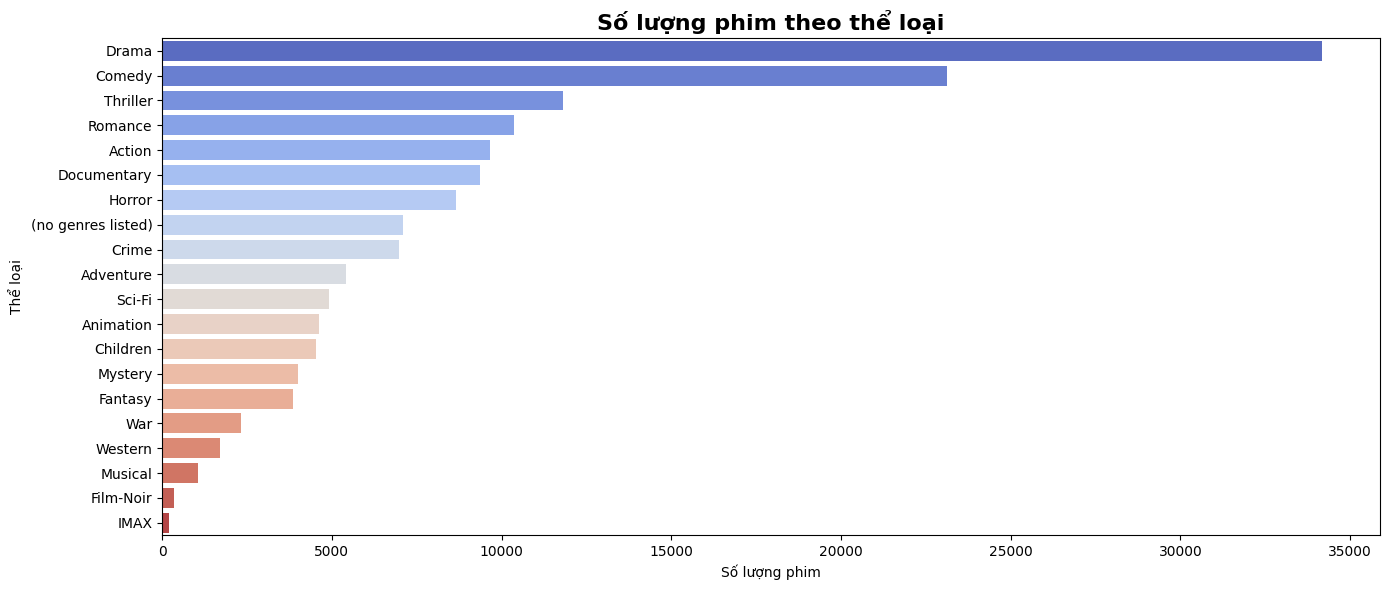

In [9]:
# 2. Visualize phân phối thể loại
plt.figure(figsize=(14, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='coolwarm')
plt.title('Số lượng phim theo thể loại', fontsize=16, fontweight='bold')
plt.xlabel('Số lượng phim')
plt.ylabel('Thể loại')
plt.tight_layout()
plt.show()

In [12]:
movie_rating_counts = df.groupby('title')['rating'].count()

# Lấy danh sách phim có trên 50 rating (hoặc 30 tùy bạn chọn)
popular_movies = movie_rating_counts[movie_rating_counts >= 50].index

# Lọc dataframe, chỉ giữ lại phim phổ biến
df_clean = df[df['title'].isin(popular_movies)]

print(f"Dữ liệu gốc: {df.shape}")
print(f"Dữ liệu sau khi lọc phim ít view: {df_clean.shape}")

Dữ liệu gốc: (32000204, 6)
Dữ liệu sau khi lọc phim ít view: (31499692, 6)


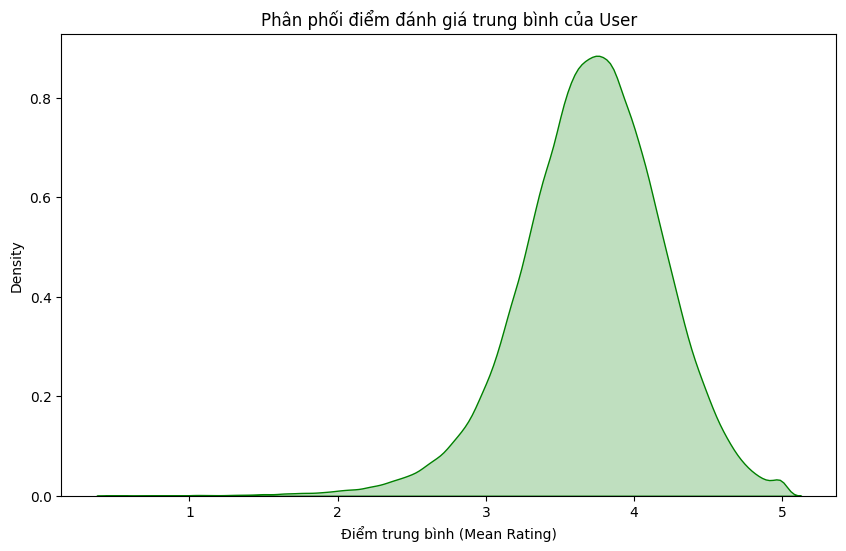

In [ ]:
# Tính điểm trung bình mỗi user đưa ra
user_mean_rating = df_clean.groupby('userId')['rating'].mean()

plt.figure(figsize=(10,6))
sns.kdeplot(user_mean_rating, fill=True, color='green')
plt.title('Phân phối điểm đánh giá trung bình của User')
plt.xlabel('Điểm trung bình (Mean Rating)')
plt.show()



Thông qua quá trình EDA, 3 thách thức chính của bộ dữ liệu:

1. Dữ liệu bị Long-tail: Đa số phim rất ít tương tác -> Cần lọc bỏ phim < 50 ratings.

2. Người dùng có xu hướng chấm điểm cao -> Cần dùng thuật toán có khả năng chuẩn hóa (như SVD).

3. Mất cân bằng thể loại: Drama/Comedy chiếm đa số -> Cần lưu ý khi đánh giá đa dạng của kết quả gợi ý."

### Bảng tags.csv: Hiểu sâu về nội dung (Hơn cả thể loại)
Bản chất: Cột genres trong bảng Movies khá chung chung (Ví dụ: Action, Adventure). Nhưng tags là các từ khóa do người dùng tự gán (User-generated content). Nó chi tiết và "đời" hơn nhiều.

Ví dụ:

Phim: Interstellar.

Genre: Sci-Fi. (Rất chung chung).

Tags: "time travel", "black hole", "Christopher Nolan", "mind-bending", "emotional".

### Bảng links.csv: Cây cầu nối ra thế giới thực
Bản chất: MovieLens (movieId) là một hệ thống định danh nội bộ. Nó không chứa hình ảnh, trailer, diễn viên hay tóm tắt phim. Bảng links.csv là bảng "từ điển" giúp bạn dịch movieId sang ID của các cơ sở dữ liệu phim lớn nhất thế giới:

imdbId: ID trên trang IMDb (Internet Movie Database).

tmdbId: ID trên trang The Movie Database (TMDB).

Tại sao bạn cần nó cho Seminar? Nếu bạn xây dựng một web app (demo) cho thầy cô xem:

Không có links: Kết quả gợi ý chỉ là một dòng chữ khô khan: "Bạn nên xem phim: Toy Story (1995)".

Có links: Bạn dùng tmdbId để gọi API của TMDB, lấy về Poster (ảnh bìa), Trailer, Tóm tắt nội dung. Giao diện sẽ hiện lên hình ảnh đẹp mắt.